### HR Analytics Code - Stacking and Blending Ensemble Models

In [360]:
import pandas as pd
import numpy as np

In [361]:
# Load the data
hr_df= pd.read_csv( "C:\\Users\\Naman\\Downloads\\AnalytixLab\\14. Decision Trees - Ensemble Learning\\14. Decision Trees - Ensemble Learning\\HR_comma_sep.csv")

In [362]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [364]:
# Encoding Categorical Features
numerical_features = ['satisfaction_level', 'last_evaluation', 'number_project',
     'average_montly_hours', 'time_spend_company','Work_accident','promotion_last_5years']

categorical_features = ['department', 'salary']

In [365]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [366]:
for c_feature in categorical_features:
    hr_df= create_dummies(hr_df, c_feature)

In [367]:
hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,1,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,1,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,1,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0


In [368]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 19 columns):
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             14999 non-null 

In [369]:
##Taking random sample from hr_df for decesion tree
dt_hr_df=hr_df.sample(frac=1, replace=True,random_state=123)

In [370]:
dt_hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 3582 to 6103
Data columns (total 19 columns):
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             14999 non-nul

In [371]:
dt_hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
3582,0.62,0.91,3,133,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
11646,0.88,0.51,3,211,7,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1346,0.73,0.95,4,223,6,0,1,0,0,0,0,0,0,0,0,1,0,1,0
12252,0.19,0.59,7,192,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5218,0.98,0.64,3,263,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [372]:
#Splitting the data

dt_feature_columns = dt_hr_df.columns.difference( ['left'] )

In [373]:
dt_feature_columns

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [374]:
from sklearn.cross_validation import train_test_split


dt_train_X, dt_test_X, dt_train_y, dt_test_y = train_test_split( dt_hr_df[dt_feature_columns],
                                                  dt_hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [375]:
import sklearn.tree as dt

In [376]:
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export
from sklearn.grid_search import GridSearchCV

In [377]:
dt_clf_tree = DecisionTreeClassifier( max_depth = 3 )
dt_clf_tree.fit( dt_train_X, dt_train_y )

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [378]:
dt_tree_train_pred = pd.DataFrame( { 'actual':  dt_train_y,
                            'predicted': dt_clf_tree.predict( dt_train_X ) } )

In [379]:
dt_tree_train_pred.head()

,actual,predicted
12152,1,1
14994,1,1
13612,0,0
3346,0,0
11737,0,0


In [380]:
dt_hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
3582,0.62,0.91,3,133,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1
11646,0.88,0.51,3,211,7,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1346,0.73,0.95,4,223,6,0,1,0,0,0,0,0,0,0,0,1,0,1,0
12252,0.19,0.59,7,192,3,0,1,0,0,0,0,0,0,0,1,0,0,1,0
5218,0.98,0.64,3,263,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [381]:
metrics.accuracy_score( dt_tree_train_pred.actual, dt_tree_train_pred.predicted )

0.9518293191099259

In [382]:
dt_tree_test_pred = pd.DataFrame( { 'actual':  dt_test_y,
                            'predicted': dt_clf_tree.predict( dt_test_X ) } )

In [383]:
metrics.accuracy_score( dt_tree_test_pred.actual, dt_tree_test_pred.predicted )

0.948

###Fine tuning parameters for DT

In [18]:
param_grid = {'max_depth': np.arange(3, 12),
             'max_features': np.arange(3,8),
             'criterion':['gini','entropy'],
             'min_samples_split':np.arange(2,10)}

In [ ]:
dt_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10)
dt_tree.fit( dt_train_X, dt_train_y )

In [ ]:
dt_tree.best_params_

In [ ]:
dt_tree.best_score_

In [ ]:
test_roc_like_df.info()

In [ ]:
##Building Final Decision Tree Model

In [384]:
dt_clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth = 11, max_features=7,min_samples_split= 3 )
dt_clf_tree.fit( dt_train_X, dt_train_y )

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=11,
            max_features=7, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [385]:
dt_tree_train_pred = pd.DataFrame( { 'actual':  dt_train_y,
                            'predicted': dt_clf_tree.predict( dt_train_X ) } )

In [386]:
metrics.accuracy_score( dt_tree_train_pred.actual, dt_tree_train_pred.predicted )

0.988832402700225

In [387]:
dt_tree_test_pred = pd.DataFrame( { 'actual':  dt_test_y,
                            'predicted': dt_clf_tree.predict( dt_test_X ) } )

In [388]:
metrics.accuracy_score( dt_tree_test_pred.actual, dt_tree_test_pred.predicted )

0.984

In [389]:
##Cheking goodness of model on train data

In [390]:
dt_train_predicted_prob = pd.DataFrame(dt_clf_tree.predict_proba(dt_train_X))[[1]]
dt_train_predicted_prob.columns = ['prob']
actual=dt_train_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
dt_hr_train_predict = pd.concat([actual, dt_train_predicted_prob], axis=1)
dt_hr_train_predict.columns = ['index','actual','prob']
dt_hr_train_predict.set_index('index',inplace=True)
dt_hr_train_predict.head()

,actual,prob
index,,
12152,1,0.996099
14994,1,0.996099
13612,0,0.000000
3346,0,0.011065
11737,0,0.000000


In [391]:
dt_hr_train_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11999 entries, 12152 to 8495
Data columns (total 2 columns):
actual    11999 non-null int64
prob      11999 non-null float64
dtypes: float64(1), int64(1)
memory usage: 281.2 KB


In [392]:
from sklearn import metrics

In [393]:
cm = metrics.confusion_matrix( dt_tree_train_pred.actual,
                            dt_tree_train_pred.predicted, [1,0] )
cm

array([[2786,  117],
       [  17, 9079]], dtype=int64)

In [394]:
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

Text(0.5,15,'Predicted label')

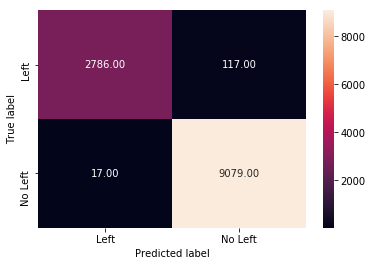

In [395]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [396]:
9014/(9014+82)

0.9909850483729111

In [397]:
2724/(2724+179)

0.9383396486393386

In [398]:
score = metrics.accuracy_score( dt_tree_train_pred.actual, dt_tree_train_pred.predicted )
round( float(score), 2 )

0.99

In [399]:
auc_score = metrics.roc_auc_score( dt_hr_train_predict.actual, dt_hr_train_predict.prob  )
round( float( auc_score ), 2 )

1.0

In [400]:
##Cheking goodness of model on test data

In [401]:
cm = metrics.confusion_matrix( dt_tree_test_pred.actual,
                            dt_tree_test_pred.predicted, [1,0] )
cm

array([[ 692,   37],
       [  11, 2260]], dtype=int64)

Text(0.5,15,'Predicted label')

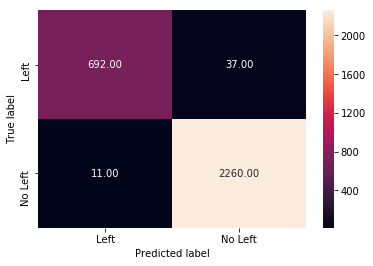

In [402]:
sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [403]:
2240/(2240+31)

0.9863496257155439

In [404]:
670/(670+59)

0.9190672153635117

In [405]:
dt_test_predicted_prob = pd.DataFrame(dt_clf_tree.predict_proba(dt_test_X))[[1]]
dt_test_predicted_prob.columns = ['prob']
actual=dt_test_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
dt_hr_test_predict = pd.concat([actual, dt_test_predicted_prob], axis=1)
dt_hr_test_predict.columns = ['index','actual','prob']
dt_hr_test_predict.set_index('index',inplace=True)
dt_hr_test_predict.head()
dt_hr_test_predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 12100 to 11833
Data columns (total 2 columns):
actual    3000 non-null int64
prob      3000 non-null float64
dtypes: float64(1), int64(1)
memory usage: 70.3 KB


In [406]:
score = metrics.accuracy_score( dt_tree_test_pred.actual, dt_tree_test_pred.predicted )
round( float(score), 2 )

0.98

In [407]:
auc_score = metrics.roc_auc_score( dt_hr_test_predict.actual, dt_hr_test_predict.prob  )
round( float( auc_score ), 2 )

0.98

#ROC CURVE

In [49]:
##Taking random sample from hr_df for bagging
bag_hr_df=hr_df.sample(frac=1, replace=True,random_state=124)

In [50]:
bag_hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
4558,0.80,0.83,4,183,2,1,0,1,0,0,0,0,0,0,0,1,0,1,0
4764,0.89,0.75,3,134,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0
14353,0.11,0.80,6,256,4,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8327,0.48,0.64,4,146,2,0,0,0,0,0,0,0,1,0,0,0,0,1,0
9154,0.68,0.83,5,267,3,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [51]:
bag_hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 4558 to 219
Data columns (total 19 columns):
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             14999 non-null

In [52]:
#Splitting the data

bag_feature_columns = bag_hr_df.columns.difference( ['left'] )

In [53]:
bag_feature_columns

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [54]:
from sklearn.cross_validation import train_test_split


bag_train_X, bag_test_X, bag_train_y, bag_test_y = train_test_split( bag_hr_df[bag_feature_columns],
                                                  bag_hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [55]:
import sklearn.ensemble as en

C:\Users\Naman\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [56]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
param_grid={'n_estimators':np.arange(10,20)}

In [ ]:
bag_tree = GridSearchCV(BaggingClassifier(oob_score=False,warm_start=True,n_jobs=-1), param_grid, cv = 10)
bag_tree.fit( bag_train_X, bag_train_y )

In [ ]:
bag_tree.best_estimator_

In [ ]:
bag_tree.best_score_

In [57]:
final_bag_tree=BaggingClassifier(oob_score=True,n_estimators=126)
final_bag_tree.fit(bag_train_X,bag_train_y)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=126, n_jobs=1, oob_score=True, random_state=None,
         verbose=0, warm_start=False)

In [58]:
final_bag_tree.oob_score_

0.9937494791232603

In [59]:
##Test data actual and predicted for bagging
bag_tree_test_pred = pd.DataFrame( { 'actual':  bag_test_y,
                            'predicted':final_bag_tree.predict( bag_test_X ) } )

In [60]:
##Calculating prob for test data
bag_test_predicted_prob = pd.DataFrame(final_bag_tree.predict_proba(bag_test_X))[[1]]
bag_test_predicted_prob.columns = ['prob']
actual=bag_test_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
bag_hr_test_predict = pd.concat([actual, bag_test_predicted_prob], axis=1)
bag_hr_test_predict.columns = ['index','actual','prob']
#bag_hr_test_predict.set_index('index',inplace=True)
bag_hr_test_predict.head()

,index,actual,prob
0,8172,0,0.047619
1,13206,0,0.000000
2,9226,0,0.000000
3,13912,0,0.000000
4,9680,0,0.000000


In [61]:
bag_hr_test_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
index     3000 non-null int64
actual    3000 non-null int64
prob      3000 non-null float64
dtypes: float64(1), int64(2)
memory usage: 70.4 KB


In [62]:
##Auc score for test data
auc_score = metrics.roc_auc_score( bag_hr_test_predict.actual, bag_hr_test_predict.prob  )
round( float( auc_score ), 2 )

0.99

In [63]:
##Accuracy for test data
score = metrics.accuracy_score( bag_tree_test_pred.actual, bag_tree_test_pred.predicted )
round( float(score), 2 )

0.99

In [64]:
##Train data
bag_tree_train_pred = pd.DataFrame( { 'actual':  bag_train_y,
                            'predicted':final_bag_tree.predict( bag_train_X ) } )

In [65]:
##Calculating probability for train data
bag_train_predicted_prob = pd.DataFrame(final_bag_tree.predict_proba(bag_train_X))[[1]]
bag_train_predicted_prob.columns = ['prob']
actual=bag_train_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
bag_hr_train_predict = pd.concat([actual, bag_train_predicted_prob], axis=1)
bag_hr_train_predict.columns = ['index','actual','prob']
#bag_hr_test_predict.set_index('index',inplace=True)
bag_hr_train_predict.head()

,index,actual,prob
0,8413,0,0.007937
1,9446,0,0.000000
2,7225,0,0.000000
3,7741,0,0.007937
4,1936,1,1.000000


In [66]:
bag_hr_train_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 3 columns):
index     11999 non-null int64
actual    11999 non-null int64
prob      11999 non-null float64
dtypes: float64(1), int64(2)
memory usage: 281.3 KB


In [67]:
bag_hr_train_predict.head()

,index,actual,prob
0,8413,0,0.007937
1,9446,0,0.000000
2,7225,0,0.000000
3,7741,0,0.007937
4,1936,1,1.000000


In [68]:
##Calculating accuracy for train data
score = metrics.accuracy_score( bag_tree_train_pred.actual, bag_tree_train_pred.predicted )
round( float(score), 2 )

1.0

In [69]:
##Calculating auc for train data
auc_score = metrics.roc_auc_score( bag_hr_train_predict.actual, bag_hr_train_predict.prob  )
round( float( auc_score ), 2 )

1.0

In [70]:
##Taking random sample from hr_df for random forest
rf_hr_df=hr_df.sample(frac=1, replace=True,random_state=125)

In [71]:
rf_hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
3005,0.54,0.74,3,185,4,0,0,0,0,0,0,0,0,0,1,0,0,1,0
10397,0.81,0.84,4,173,4,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5346,0.55,0.66,3,164,2,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3927,0.63,0.97,4,234,2,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5375,0.67,0.97,4,186,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0


In [72]:
rf_hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 3005 to 9396
Data columns (total 19 columns):
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             14999 non-nul

In [73]:
#Splitting the data

rf_feature_columns = rf_hr_df.columns.difference( ['left'] )

In [74]:
rf_feature_columns

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [75]:
from sklearn.cross_validation import train_test_split


rf_train_X, rf_test_X, rf_train_y, rf_test_y = train_test_split( rf_hr_df[rf_feature_columns],
                                                  rf_hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
RandomForestClassifier?

In [78]:
rf_tree = RandomForestClassifier(oob_score=True,n_estimators=100)
rf_tree.fit( rf_train_X, rf_train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [79]:
radm_test_pred = pd.DataFrame( { 'actual':  rf_test_y,
                            'predicted': rf_tree.predict( rf_test_X ) } )

In [80]:
metrics.accuracy_score( radm_test_pred.actual, radm_test_pred.predicted )

0.9966666666666667

Text(0.5,15,'Predicted label')

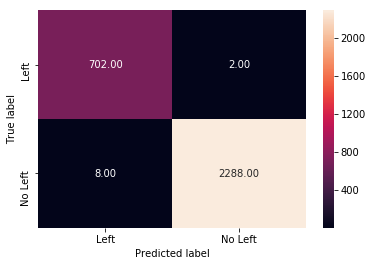

In [81]:
tree_cm = metrics.confusion_matrix( radm_test_pred.predicted,
                                 radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [94]:
##Parameter tuning for random forest

In [95]:
param_grid={'n_estimators':np.arange(100,150),
           'max_features':np.arange(2,18),
           'criterion':['gini','entropy']}

In [ ]:
rf_tree = GridSearchCV(RandomForestClassifier(oob_score=False,warm_start=True,n_jobs=-1), param_grid, cv = 10)
rf_tree.fit( rf_train_X, rf_train_y )

In [ ]:
rf_tree.best_estimator_

In [ ]:
rf_tree.best_score_

In [ ]:
##Making model with hypertuned parameter

In [82]:
final_rf_tree = RandomForestClassifier(oob_score=True,n_estimators=102,max_features=5,criterion='gini')

In [83]:
final_rf_tree.fit( rf_train_X, rf_train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=102, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [84]:
final_rf_tree.oob_score_

0.9945828819068255

In [85]:
##Test data actual and predicted for random forest
rf_tree_test_pred = pd.DataFrame( { 'actual':  rf_test_y,
                            'predicted':final_rf_tree.predict( rf_test_X ) } )

In [86]:
##Calculating prob for test data
rf_test_predicted_prob = pd.DataFrame(final_rf_tree.predict_proba(rf_test_X))[[1]]
rf_test_predicted_prob.columns = ['prob']
actual=rf_test_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
rf_hr_test_predict = pd.concat([actual,rf_test_predicted_prob], axis=1)
rf_hr_test_predict.columns = ['index','actual','prob']
#bag_hr_test_predict.set_index('index',inplace=True)
rf_hr_test_predict.head()

,index,actual,prob
0,4666,0,0.000000
1,12113,1,1.000000
2,8403,0,0.000000
3,9116,0,0.019608
4,9445,0,0.000000


In [87]:
rf_hr_test_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
index     3000 non-null int64
actual    3000 non-null int64
prob      3000 non-null float64
dtypes: float64(1), int64(2)
memory usage: 70.4 KB


In [88]:
##Auc score for test data
auc_score = metrics.roc_auc_score( rf_hr_test_predict.actual, rf_hr_test_predict.prob  )
round( float( auc_score ), 2 )

1.0

In [89]:
##Accuracy for test data
score = metrics.accuracy_score( rf_tree_test_pred.actual, rf_tree_test_pred.predicted )
round( float(score), 2 )

1.0

Text(0.5,15,'Predicted label')

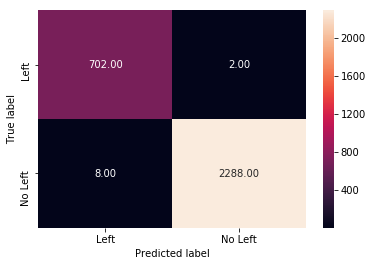

In [90]:
##CONFUSION MATRIX

tree_cm = metrics.confusion_matrix( rf_tree_test_pred.predicted,
                                 rf_tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [91]:
##Train data
rf_tree_train_pred = pd.DataFrame( { 'actual':  rf_train_y,
                            'predicted':final_rf_tree.predict( rf_train_X ) } )

In [92]:
##Calculating prob for train data
rf_train_predicted_prob = pd.DataFrame(final_rf_tree.predict_proba(rf_train_X))[[1]]
rf_train_predicted_prob.columns = ['prob']
actual=rf_train_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
rf_hr_train_predict = pd.concat([actual,rf_train_predicted_prob], axis=1)
rf_hr_train_predict.columns = ['index','actual','prob']
#bag_hr_test_predict.set_index('index',inplace=True)
rf_hr_train_predict.head()

,index,actual,prob
0,8612,0,0.0
1,12068,1,1.0
2,13285,0,0.0
3,7203,0,0.0
4,9247,0,0.0


In [93]:
rf_hr_train_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 3 columns):
index     11999 non-null int64
actual    11999 non-null int64
prob      11999 non-null float64
dtypes: float64(1), int64(2)
memory usage: 281.3 KB


In [94]:
##Auc score for test data
auc_score = metrics.roc_auc_score( rf_hr_train_predict.actual, rf_hr_train_predict.prob  )
round( float( auc_score ), 2 )

1.0

In [95]:
##Accuracy for test data
score = metrics.accuracy_score( rf_tree_train_pred.actual, rf_tree_train_pred.predicted )
round( float(score), 2 )

1.0

Text(0.5,15,'Predicted label')

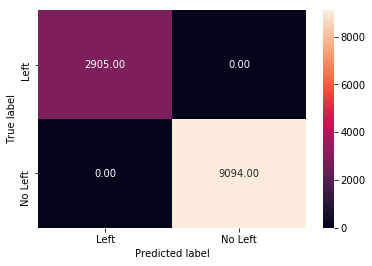

In [96]:
##CONFUSION MATRIX

tree_cm = metrics.confusion_matrix( rf_tree_train_pred.predicted,
                                 rf_tree_train_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [98]:
##Taking random sample from hr_df for boosting
boost_hr_df=hr_df.sample(frac=1, replace=True,random_state=126)

In [99]:
boost_hr_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 3942 to 11515
Data columns (total 19 columns):
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null uint8
salary_medium             14999 non-nu

In [100]:
boost_hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
3942,0.89,0.90,4,153,3,0,0,0,0,0,0,0,0,0,0,1,0,1,0
10863,0.50,0.77,4,180,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3274,0.88,0.52,5,264,4,0,0,0,0,0,0,0,0,1,0,0,0,0,1
5889,0.14,0.52,4,108,6,0,0,0,0,0,0,0,0,0,1,0,0,1,0
643,0.37,0.47,2,148,3,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [101]:
#Splitting the data

boost_feature_columns = boost_hr_df.columns.difference( ['left'] )

In [102]:
boost_feature_columns

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [103]:
from sklearn.cross_validation import train_test_split


boost_train_X,boost_test_X, boost_train_y, boost_test_y = train_test_split( boost_hr_df[boost_feature_columns],
                                                  boost_hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [104]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
AdaBoostClassifier?

In [ ]:
GradientBoostingClassifier?

In [105]:
ada_tree=AdaBoostClassifier(n_estimators=500,learning_rate=.1)
ada_tree.fit( boost_train_X, boost_train_y )

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=500, random_state=None)

In [106]:
ada_test_pred = pd.DataFrame( { 'actual':  boost_test_y,
                            'predicted': ada_tree.predict(boost_test_X ) } )

In [107]:
##Accuracy for test data
score = metrics.accuracy_score( ada_test_pred.actual, ada_test_pred.predicted )
round( float(score), 2 )

0.96

Text(0.5,15,'Predicted label')

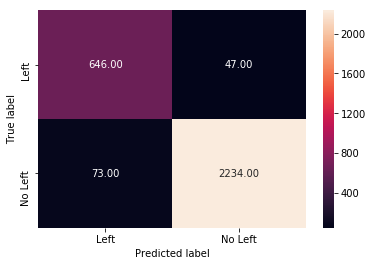

In [108]:
tree_cm = metrics.confusion_matrix( ada_test_pred.predicted,
                                 ada_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [109]:
ada_train_pred = pd.DataFrame( { 'actual':  boost_train_y,
                            'predicted': ada_tree.predict(boost_train_X ) } )

In [110]:
score = metrics.accuracy_score( ada_train_pred.actual, ada_train_pred.predicted )
round( float(score), 2 )

0.96

Text(0.5,15,'Predicted label')

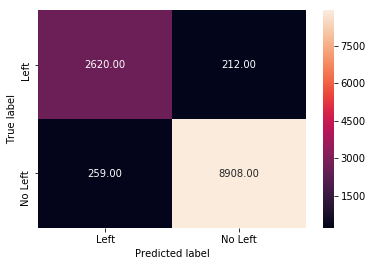

In [111]:
tree_cm = metrics.confusion_matrix( ada_train_pred.predicted,
                                 ada_train_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [112]:
##Hyper tuning of parameter for adaboost
param_grid={'n_estimators':np.arange(800,1000),
           'learning_rate':np.arange(0.001,1)}

In [ ]:
AdaBoostClassifier?

In [38]:
ada_tree = GridSearchCV(AdaBoostClassifier(), param_grid, cv = 10 ,verbose=False,n_jobs=-1)
ada_tree.fit( boost_train_X,boost_train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([800, 801, ..., 998, 999]), 'learning_rate': array([0.001])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=False)

In [39]:
ada_tree.best_params_

{'learning_rate': 0.001, 'n_estimators': 800}

In [40]:
ada_tree.best_score_

0.9114092841070089

In [113]:
#Making model with hyper tuned parameter
final_ada_tree = AdaBoostClassifier(learning_rate=0.1,n_estimators=800)

In [114]:
final_ada_tree.fit(boost_train_X, boost_train_y )

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.1, n_estimators=800, random_state=None)

In [115]:
##Test data actual and predicted for boosting
ada_tree_test_pred = pd.DataFrame( { 'actual':  boost_test_y,
                            'predicted':final_ada_tree.predict( boost_test_X ) } )

In [116]:
##Calculating prob for test data
ada_test_predicted_prob = pd.DataFrame(final_ada_tree.predict_proba(boost_test_X))[[1]]
ada_test_predicted_prob.columns = ['prob']
actual=boost_test_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
ada_hr_test_predict = pd.concat([actual,ada_test_predicted_prob], axis=1)
ada_hr_test_predict.columns = ['index','actual','prob']
#bag_hr_test_predict.set_index('index',inplace=True)
ada_hr_test_predict.head()

,index,actual,prob
0,3542,0,0.492755
1,19,1,0.504445
2,10720,0,0.484051
3,14754,1,0.502549
4,10730,0,0.489659


In [117]:
ada_hr_test_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
index     3000 non-null int64
actual    3000 non-null int64
prob      3000 non-null float64
dtypes: float64(1), int64(2)
memory usage: 70.4 KB


In [118]:
##Auc score for test data
auc_score = metrics.roc_auc_score( ada_hr_test_predict.actual, ada_hr_test_predict.prob  )
round( float( auc_score ), 2 )

0.99

In [119]:
##Accuracy for test data
score = metrics.accuracy_score( ada_tree_test_pred.actual, ada_tree_test_pred.predicted )
round( float(score), 2 )

0.96

Text(0.5,15,'Predicted label')

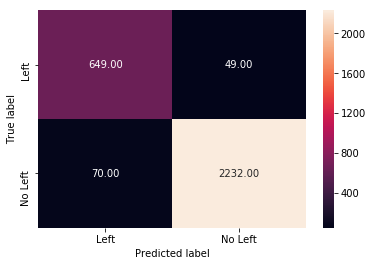

In [120]:
##CONFUSION MATRIX

tree_cm = metrics.confusion_matrix( ada_tree_test_pred.predicted,
                                 ada_tree_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [121]:
##Train data
ada_tree_train_pred = pd.DataFrame( { 'actual':  boost_train_y,
                            'predicted':final_ada_tree.predict( boost_train_X ) } )

In [122]:
##Calculating prob for test data
ada_train_predicted_prob = pd.DataFrame(final_ada_tree.predict_proba(boost_train_X))[[1]]
ada_train_predicted_prob.columns = ['prob']
actual=boost_train_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
ada_hr_train_predict = pd.concat([actual,ada_train_predicted_prob], axis=1)
ada_hr_train_predict.columns = ['index','actual','prob']
#bag_hr_test_predict.set_index('index',inplace=True)
ada_hr_train_predict.head()

,index,actual,prob
0,486,1,0.509639
1,11470,0,0.489143
2,9818,0,0.491283
3,3819,0,0.476900
4,7746,0,0.498339


In [123]:
ada_hr_train_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 3 columns):
index     11999 non-null int64
actual    11999 non-null int64
prob      11999 non-null float64
dtypes: float64(1), int64(2)
memory usage: 281.3 KB


In [124]:
##Auc score for train data
auc_score = metrics.roc_auc_score( ada_hr_train_predict.actual, ada_hr_train_predict.prob  )
round( float( auc_score ), 2 )

0.99

In [125]:
##Taking random sample from hr_df for bootstrap sample 5
final_hr_df=hr_df.sample(frac=1, replace=True,random_state=127)

In [126]:
final_feature_columns = rf_hr_df.columns.difference( ['left'] )

In [127]:
from sklearn.cross_validation import train_test_split


final_train_X,final_test_X, final_train_y, final_test_y = train_test_split( final_hr_df[final_feature_columns],
                                                  final_hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [128]:
##Finding Probabilitiy Y=1  for final_hr_df from DT model

In [129]:
final_dt_test_predicted_prob = pd.DataFrame(dt_clf_tree.predict_proba(final_hr_df[final_feature_columns]))[[1]]

In [130]:
final_dt_test_predicted_prob.columns = ['prob_DT']

In [131]:
final_dt_test_predicted_prob.head()

,prob_DT
0,1.000000
1,0.005811
2,0.998140
3,1.000000
4,0.307692


In [132]:
actual=final_hr_df.reset_index()

In [133]:
actual.head()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,12489,0.76,0.88,4,206,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1
1,8252,0.55,0.87,4,200,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,866,0.41,0.46,2,128,3,0,1,0,0,1,0,0,0,0,0,0,0,1,0
3,1116,0.09,0.85,6,260,4,0,1,0,0,0,0,0,0,0,0,1,0,0,1
4,11300,0.77,0.76,6,263,6,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [134]:
final_hr_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
12489,0.76,0.88,4,206,4,0,1,0,0,0,1,0,0,0,0,0,0,0,1
8252,0.55,0.87,4,200,3,0,0,0,0,0,0,0,1,0,0,0,0,1,0
866,0.41,0.46,2,128,3,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1116,0.09,0.85,6,260,4,0,1,0,0,0,0,0,0,0,0,1,0,0,1
11300,0.77,0.76,6,263,6,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [135]:

final_hr_df = pd.concat([actual, final_dt_test_predicted_prob], axis=1)
final_hr_df.head()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,prob_DT
0,12489,0.76,0.88,4,206,4,0,1,0,0,...,1,0,0,0,0,0,0,0,1,1.000000
1,8252,0.55,0.87,4,200,3,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0.005811
2,866,0.41,0.46,2,128,3,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.998140
3,1116,0.09,0.85,6,260,4,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1.000000
4,11300,0.77,0.76,6,263,6,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0.307692


In [136]:
final_hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 21 columns):
index                     14999 non-null int64
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null 

In [137]:
##Finding Probabilitiy Y=1 test data for final_hr_df from Bagging model

final_bag_test_predicted_prob = pd.DataFrame(final_bag_tree.predict_proba(final_hr_df[final_feature_columns]))[[1]]
final_bag_test_predicted_prob.columns = ['prob_bag']
#actual=final_test_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
final_hr_df = pd.concat([final_hr_df, final_bag_test_predicted_prob], axis=1)
#final_bag_hr_test_predict.columns = ['index','actual','prob']
#final_bag_hr_test_predict.set_index('index',inplace=True)
final_hr_df.head()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,...,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,prob_DT,prob_bag
0,12489,0.76,0.88,4,206,4,0,1,0,0,...,0,0,0,0,0,0,0,1,1.000000,1.0
1,8252,0.55,0.87,4,200,3,0,0,0,0,...,0,1,0,0,0,0,1,0,0.005811,0.0
2,866,0.41,0.46,2,128,3,0,1,0,0,...,0,0,0,0,0,0,1,0,0.998140,1.0
3,1116,0.09,0.85,6,260,4,0,1,0,0,...,0,0,0,0,1,0,0,1,1.000000,1.0
4,11300,0.77,0.76,6,263,6,0,0,0,0,...,0,0,0,1,0,0,1,0,0.307692,0.0


In [138]:
final_hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 22 columns):
index                     14999 non-null int64
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null 

In [139]:
final_feature_columns

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'promotion_last_5years', 'salary_low',
       'salary_medium', 'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [140]:
##Finding Probabilitiy Y=1  for final_hr_df from RF model

final_rf_test_predicted_prob = pd.DataFrame(final_rf_tree.predict_proba(final_hr_df[final_feature_columns]))[[1]]
final_rf_test_predicted_prob.columns = ['prob_RF']
#actual=final_test_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
final_hr_df = pd.concat([final_hr_df, final_rf_test_predicted_prob], axis=1)
#final_rf_hr_test_predict.columns = ['index','actual','prob']
#final_rf_hr_test_predict.set_index('index',inplace=True)
final_hr_df.head()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,...,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,prob_DT,prob_bag,prob_RF
0,12489,0.76,0.88,4,206,4,0,1,0,0,...,0,0,0,0,0,0,1,1.000000,1.0,0.901961
1,8252,0.55,0.87,4,200,3,0,0,0,0,...,1,0,0,0,0,1,0,0.005811,0.0,0.000000
2,866,0.41,0.46,2,128,3,0,1,0,0,...,0,0,0,0,0,1,0,0.998140,1.0,1.000000
3,1116,0.09,0.85,6,260,4,0,1,0,0,...,0,0,0,1,0,0,1,1.000000,1.0,1.000000
4,11300,0.77,0.76,6,263,6,0,0,0,0,...,0,0,1,0,0,1,0,0.307692,0.0,0.078431


In [141]:
final_hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 23 columns):
index                     14999 non-null int64
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null 

In [142]:
##Finding Probabilitiy Y=1  for final_hr_df from Boosting model

final_ada_test_predicted_prob = pd.DataFrame(final_ada_tree.predict_proba(final_hr_df[final_feature_columns]))[[1]]
final_ada_test_predicted_prob.columns = ['prob_BOOST']
#actual=final_test_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
final_hr_df = pd.concat([final_hr_df, final_ada_test_predicted_prob], axis=1)
#final_ada_hr_test_predict.columns = ['index','actual','prob']
#final_ada_hr_test_predict.set_index('index',inplace=True)
#final_hr_df.drop('prob',inplace=True,axis=1)

In [143]:
final_hr_df.head()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,...,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,prob_DT,prob_bag,prob_RF,prob_BOOST
0,12489,0.76,0.88,4,206,4,0,1,0,0,...,0,0,0,0,0,1,1.000000,1.0,0.901961,0.491018
1,8252,0.55,0.87,4,200,3,0,0,0,0,...,0,0,0,0,1,0,0.005811,0.0,0.000000,0.487387
2,866,0.41,0.46,2,128,3,0,1,0,0,...,0,0,0,0,1,0,0.998140,1.0,1.000000,0.514145
3,1116,0.09,0.85,6,260,4,0,1,0,0,...,0,0,1,0,0,1,1.000000,1.0,1.000000,0.540705
4,11300,0.77,0.76,6,263,6,0,0,0,0,...,0,1,0,0,1,0,0.307692,0.0,0.078431,0.499642


In [144]:
final_hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 24 columns):
index                     14999 non-null int64
satisfaction_level        14999 non-null float64
last_evaluation           14999 non-null float64
number_project            14999 non-null int64
average_montly_hours      14999 non-null int64
time_spend_company        14999 non-null int64
Work_accident             14999 non-null int64
left                      14999 non-null int64
promotion_last_5years     14999 non-null int64
department_RandD          14999 non-null uint8
department_accounting     14999 non-null uint8
department_hr             14999 non-null uint8
department_management     14999 non-null uint8
department_marketing      14999 non-null uint8
department_product_mng    14999 non-null uint8
department_sales          14999 non-null uint8
department_support        14999 non-null uint8
department_technical      14999 non-null uint8
salary_low                14999 non-null 

In [145]:
##Now we have the sample data for making the staking model

final_hr_df.head()

,index,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,...,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium,prob_DT,prob_bag,prob_RF,prob_BOOST
0,12489,0.76,0.88,4,206,4,0,1,0,0,...,0,0,0,0,0,1,1.000000,1.0,0.901961,0.491018
1,8252,0.55,0.87,4,200,3,0,0,0,0,...,0,0,0,0,1,0,0.005811,0.0,0.000000,0.487387
2,866,0.41,0.46,2,128,3,0,1,0,0,...,0,0,0,0,1,0,0.998140,1.0,1.000000,0.514145
3,1116,0.09,0.85,6,260,4,0,1,0,0,...,0,0,1,0,0,1,1.000000,1.0,1.000000,0.540705
4,11300,0.77,0.76,6,263,6,0,0,0,0,...,0,1,0,0,1,0,0.307692,0.0,0.078431,0.499642


### As the data is concatenated correctly now we will make the RF model for stacking

In [149]:
final_hr_df.columns

Index(['index', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium', 'prob_DT',
       'prob_bag', 'prob_RF', 'prob_BOOST'],
      dtype='object')

In [150]:
stack_feature_columns=['prob_DT','prob_bag','prob_RF','prob_BOOST']

In [151]:
stack_feature_columns

['prob_DT', 'prob_bag', 'prob_RF', 'prob_BOOST']

In [152]:
from sklearn.cross_validation import train_test_split


stack_train_X,stack_test_X, stack_train_y, stack_test_y = train_test_split( final_hr_df[stack_feature_columns],
                                                  final_hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [153]:
stack_rf_tree = RandomForestClassifier(oob_score=True,n_estimators=100)
stack_rf_tree.fit( stack_train_X, stack_train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [154]:
stack_rf_tree.oob_score_

0.998583215267939

In [155]:
stack_radm_test_pred = pd.DataFrame( { 'actual':  stack_test_y,
                            'predicted': stack_rf_tree.predict(stack_test_X ) } )

In [156]:
metrics.accuracy_score(stack_radm_test_pred.actual,stack_radm_test_pred.predicted)

0.997

Text(0.5,15,'Predicted label')

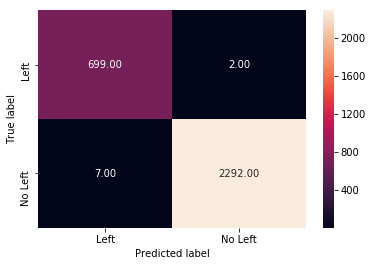

In [157]:
tree_cm = metrics.confusion_matrix( stack_radm_test_pred.predicted,
                                 stack_radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [158]:
stack_radm_train_pred = pd.DataFrame( { 'actual':  stack_train_y,
                            'predicted': stack_rf_tree.predict(stack_train_X ) } )

In [159]:
metrics.accuracy_score(stack_radm_train_pred.actual,stack_radm_train_pred.predicted)

1.0

Text(0.5,15,'Predicted label')

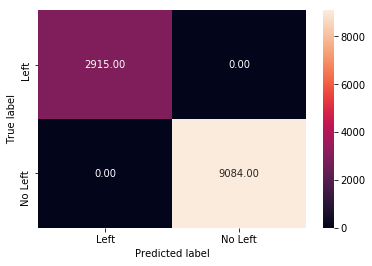

In [160]:
tree_cm = metrics.confusion_matrix( stack_radm_train_pred.predicted,
                                 stack_radm_train_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [ ]:
##Hyper parameter tuning

In [303]:
param_grid={'n_estimators':np.arange(100,150),
           'max_features':np.arange(2,5),
           'criterion':['gini','entropy']}

In [304]:
final_stack_rf_tree = GridSearchCV(RandomForestClassifier(oob_score=False,warm_start=True,n_jobs=-1), param_grid, cv = 10)
final_stack_rf_tree.fit( stack_train_X, stack_train_y )

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]), 'max_features': array([2, 3, 4]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [305]:
final_stack_rf_tree.best_params_

{'criterion': 'gini', 'max_features': 4, 'n_estimators': 141}

In [306]:
final_stack_rf_tree.best_score_

0.9949162430202517

In [307]:
{'criterion': 'gini', 'max_features': 4, 'n_estimators': 141}

{'criterion': 'gini', 'max_features': 4, 'n_estimators': 141}

In [161]:
###Making Stacking model with hyper tuned parameter

In [162]:
final_stack_rf_tree = RandomForestClassifier(oob_score=True,n_estimators=141,max_features=4,criterion='gini')
final_stack_rf_tree.fit( stack_train_X, stack_train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=4, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=141, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [163]:
final_stack_rf_tree.oob_score_

0.9980831735977999

In [164]:
final_stack_radm_test_pred = pd.DataFrame( { 'actual':  stack_test_y,
                            'predicted': final_stack_rf_tree.predict(stack_test_X ) } )

In [165]:
metrics.accuracy_score(final_stack_radm_test_pred.actual,final_stack_radm_test_pred.predicted)

0.9963333333333333

Text(0.5,15,'Predicted label')

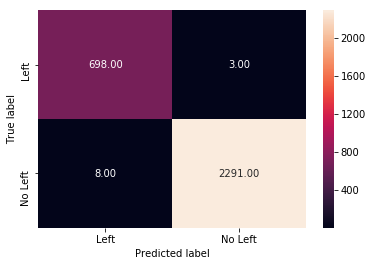

In [166]:
tree_cm = metrics.confusion_matrix( final_stack_radm_test_pred.predicted,
                                 final_stack_radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [168]:
##Calculating prob for test data
final_stack_rf_test_predicted_prob = pd.DataFrame(final_stack_rf_tree.predict_proba(stack_test_X))[[1]]
final_stack_rf_test_predicted_prob.columns = ['prob']
actual=stack_test_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
final_stack_rf_hr_test_predict = pd.concat([actual,final_stack_rf_test_predicted_prob], axis=1)
final_stack_rf_hr_test_predict.columns = ['index','actual','prob']
#bag_hr_test_predict.set_index('index',inplace=True)
final_stack_rf_hr_test_predict.head()

,index,actual,prob
0,6723,0,0.0
1,6473,0,0.0
2,4679,0,0.0
3,862,0,0.0
4,7286,0,0.0


In [171]:
stack_test_X.head()

,prob_DT,prob_bag,prob_RF,prob_BOOST
6723,0.000000,0.015873,0.058824,0.475066
6473,0.018797,0.000000,0.000000,0.483465
4679,0.096296,0.015873,0.000000,0.481923
862,0.000000,0.000000,0.009804,0.482783
7286,0.005811,0.000000,0.000000,0.487168


In [169]:
final_stack_rf_hr_test_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
index     3000 non-null int64
actual    3000 non-null int64
prob      3000 non-null float64
dtypes: float64(1), int64(2)
memory usage: 70.4 KB


In [172]:
##Auc score for test data
auc_score = metrics.roc_auc_score( final_stack_rf_hr_test_predict.actual, final_stack_rf_hr_test_predict.prob  )
round( float( auc_score ), 5 )

0.99707

In [173]:
final_stack_radm_train_pred = pd.DataFrame( { 'actual':  stack_train_y,
                            'predicted': final_stack_rf_tree.predict(stack_train_X ) } )

In [174]:
metrics.accuracy_score(final_stack_radm_train_pred.actual,final_stack_radm_train_pred.predicted)

1.0

Text(0.5,15,'Predicted label')

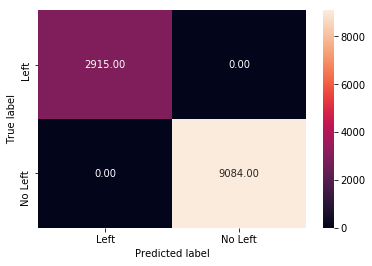

In [175]:
tree_cm = metrics.confusion_matrix( final_stack_radm_train_pred.predicted,
                                 final_stack_radm_train_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [176]:
##Calculating prob for train data
final_stack_rf_train_predicted_prob = pd.DataFrame(final_stack_rf_tree.predict_proba(stack_train_X))[[1]]
final_stack_rf_train_predicted_prob.columns = ['prob']
actual=stack_train_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
final_stack_rf_hr_train_predict = pd.concat([actual,final_stack_rf_train_predicted_prob], axis=1)
final_stack_rf_hr_train_predict.columns = ['index','actual','prob']
#bag_hr_test_predict.set_index('index',inplace=True)
final_stack_rf_hr_train_predict.head()

,index,actual,prob
0,9838,0,0.0
1,7689,0,0.0
2,6557,0,0.0
3,6872,0,0.0
4,820,0,0.0


In [177]:
##Auc score for test data
auc_score = metrics.roc_auc_score( final_stack_rf_hr_train_predict.actual, final_stack_rf_hr_train_predict.prob  )
round( float( auc_score ), 5 )

1.0

### Making model for blending

In [179]:
final_hr_df.columns

Index(['index', 'satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium', 'prob_DT',
       'prob_bag', 'prob_RF', 'prob_BOOST'],
      dtype='object')

In [181]:
blend_feature_columns=final_hr_df.columns.difference(['index','left'])

In [182]:
blend_feature_columns

Index(['Work_accident', 'average_montly_hours', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical', 'last_evaluation',
       'number_project', 'prob_BOOST', 'prob_DT', 'prob_RF', 'prob_bag',
       'promotion_last_5years', 'salary_low', 'salary_medium',
       'satisfaction_level', 'time_spend_company'],
      dtype='object')

In [183]:
from sklearn.cross_validation import train_test_split


blend_train_X,blend_test_X, blend_train_y, blend_test_y = train_test_split( final_hr_df[blend_feature_columns],
                                                  final_hr_df['left'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [194]:
blend_rf_tree = RandomForestClassifier(oob_score=True,n_estimators=100)
blend_rf_tree.fit( blend_train_X, blend_train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [195]:
blend_rf_tree.oob_score_

0.998583215267939

In [196]:
blend_radm_test_pred = pd.DataFrame( { 'actual':  blend_test_y,
                            'predicted': blend_rf_tree.predict(blend_test_X ) } )

In [197]:
metrics.accuracy_score(blend_radm_test_pred.actual,blend_radm_test_pred.predicted)

0.997

Text(0.5,15,'Predicted label')

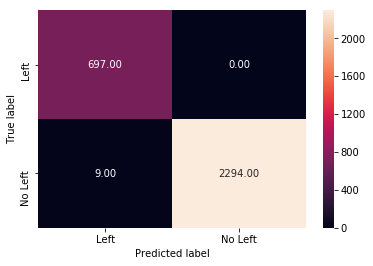

In [198]:
tree_cm = metrics.confusion_matrix( blend_radm_test_pred.predicted,
                                 blend_radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [199]:
blend_radm_train_pred = pd.DataFrame( { 'actual':  blend_train_y,
                            'predicted': blend_rf_tree.predict(blend_train_X ) } )

In [200]:
metrics.accuracy_score(blend_radm_train_pred.actual,blend_radm_train_pred.predicted)

1.0

Text(0.5,15,'Predicted label')

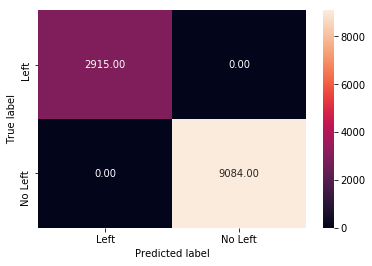

In [201]:
tree_cm = metrics.confusion_matrix( blend_radm_train_pred.predicted,
                                 blend_radm_train_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [205]:
blend_feature_columns.shape

(22,)

In [206]:
##Hyper parameter tuning
param_grid={'n_estimators':np.arange(100,150),
           'max_features':np.arange(2,22)
           }

In [207]:
final_blend_rf_tree = GridSearchCV(RandomForestClassifier(oob_score=False,warm_start=True,n_jobs=-1), param_grid, cv =5)
final_blend_rf_tree.fit(blend_train_X,blend_train_y )

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0, warm_start=True),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
       126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
       139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]), 'max_features': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbo

In [208]:
final_blend_rf_tree.best_params_

{'max_features': 3, 'n_estimators': 106}

In [209]:
final_blend_rf_tree.best_score_

0.9983331944328694

###Making model with hypertuned parameter

In [211]:
final_blend_rf_tree = RandomForestClassifier(oob_score=True,n_estimators=106,max_features=3,criterion='gini')
final_blend_rf_tree.fit( blend_train_X,blend_train_y )

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=106, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [212]:
final_blend_rf_tree.oob_score_

0.9988332361030086

In [215]:
final_blend_radm_test_pred=pd.DataFrame({'actual':blend_test_y,'predicted':final_blend_rf_tree.predict(blend_test_X)})

Text(0.5,15,'Predicted label')

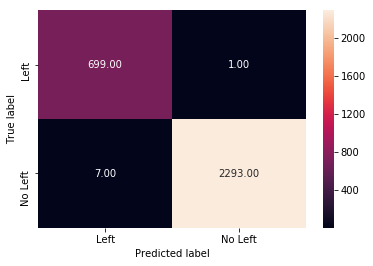

In [216]:
tree_cm = metrics.confusion_matrix( final_blend_radm_test_pred.predicted,
                                 final_blend_radm_test_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [217]:
##Calculating prob for test data
final_blend_rf_test_predicted_prob = pd.DataFrame(final_blend_rf_tree.predict_proba(blend_test_X))[[1]]
final_blend_rf_test_predicted_prob.columns = ['prob']
actual=blend_test_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
final_blend_rf_hr_test_predict = pd.concat([actual,final_blend_rf_test_predicted_prob], axis=1)
final_blend_rf_hr_test_predict.columns = ['index','actual','prob']
#bag_hr_test_predict.set_index('index',inplace=True)
final_blend_rf_hr_test_predict.head()

,index,actual,prob
0,6723,0,0.018868
1,6473,0,0.000000
2,4679,0,0.009434
3,862,0,0.000000
4,7286,0,0.000000


In [219]:
metrics.roc_auc_score(final_blend_rf_hr_test_predict.actual,final_blend_rf_hr_test_predict.prob)

0.9995921741900906

In [220]:
metrics.accuracy_score(final_blend_radm_test_pred.actual,final_blend_radm_test_pred.predicted)

0.9973333333333333

In [221]:
final_blend_radm_train_pred = pd.DataFrame( { 'actual':  blend_train_y,
                            'predicted': final_blend_rf_tree.predict(blend_train_X ) } )

In [222]:
metrics.accuracy_score(final_blend_radm_train_pred.actual,final_blend_radm_train_pred.predicted)

1.0

Text(0.5,15,'Predicted label')

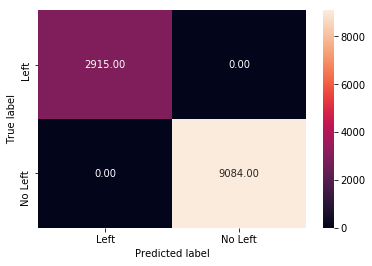

In [225]:
tree_cm = metrics.confusion_matrix( final_blend_radm_train_pred.predicted,
                                 final_blend_radm_train_pred.actual,
                                 [1,0] )
sn.heatmap(tree_cm, annot=True,
         fmt='.2f',
         xticklabels = ["Left", "No Left"] , yticklabels = ["Left", "No Left"] )

plt.ylabel('True label')
plt.xlabel('Predicted label')

In [223]:
##Calculating prob for test data
final_blend_rf_train_predicted_prob = pd.DataFrame(final_blend_rf_tree.predict_proba(blend_train_X))[[1]]
final_blend_rf_train_predicted_prob.columns = ['prob']
actual=blend_train_y.reset_index()
#actual.drop('index',axis=1,inplace=True)
# making a DataFrame with actual and prob columns
final_blend_rf_hr_train_predict = pd.concat([actual,final_blend_rf_train_predicted_prob], axis=1)
final_blend_rf_hr_train_predict.columns = ['index','actual','prob']
#bag_hr_test_predict.set_index('index',inplace=True)
final_blend_rf_hr_train_predict.head()

,index,actual,prob
0,9838,0,0.009434
1,7689,0,0.000000
2,6557,0,0.000000
3,6872,0,0.000000
4,820,0,0.000000
